In [1]:
import jieba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
# CITY = 'beijing'
CITY = 'shanghai'

In [3]:
room_df = pd.read_csv('./data/{}/room.csv.bak'.format(CITY))
host_df = pd.read_csv('./data/{}/host.csv.bak'.format(CITY))
best_room_df = pd.read_csv('data/{}/best_room.csv'.format(CITY))
left_room_df = room_df.drop(best_room_df.index)

In [4]:
def cut_word(data:pd.Series):
    a = []
    word_dict = {}
    with open('./stopword.txt', 'r', encoding='utf-8') as f:
        result = f.read().split()
    for i in data:
        words = jieba.lcut(i)
        word = [x for x in words if x not in result]
        a.extend(word)
    for word in a:
        word_dict.setdefault(word, 0)
        word_dict[word]+=1
    return ' '.join(a), word_dict

In [5]:
def deal_fake_word(data: dict):
    valid_word_dict = {}
    for i in data.keys():
        if len(i) > 1:
            valid_word_dict[i] = data[i]
    return valid_word_dict

In [6]:
def resort_keyword(raw_best_word_df:dict, raw_left_word_df:dict):
    best_word_df = raw_best_word_df.copy(deep=True)
    left_word_df = raw_left_word_df.copy(deep=False)
    for best_word in best_word_df.index:
        try:
            pos1 = left_word_df.index.to_list().index(best_word)
            pos2 = best_word_df.index.to_list().index(best_word)
            if pos1 > pos2:
                best_word_df[best_word]+=min(pos1-pos2, 15)
        except:
            continue
    return best_word_df

In [7]:
best_name_summary, best_word_dict = cut_word(best_room_df['name'])
left_name_summary, left_word_dict = cut_word(left_room_df['name'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Silence\AppData\Local\Temp\jieba.cache
Loading model cost 1.470 seconds.
Prefix dict has been built successfully.


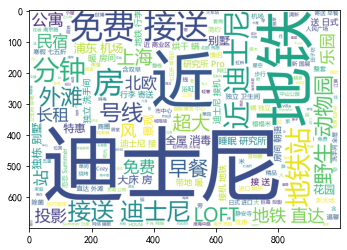

In [8]:
# 受欢迎关键词云
w = WordCloud(width=1000, height=700, background_color='white',font_path='msyh.ttc').generate(best_name_summary)
plt.imshow(w)

In [9]:
best_word_dict = deal_fake_word(best_word_dict)
left_word_dict = deal_fake_word(left_word_dict)
best_word_df = pd.Series(best_word_dict).sort_values(ascending=False)
left_word_df = pd.Series(left_word_dict).sort_values(ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '迪士尼'),
  Text(1, 0, '地铁'),
  Text(2, 0, '接送'),
  Text(3, 0, '免费'),
  Text(4, 0, '独立'),
  Text(5, 0, '外滩'),
  Text(6, 0, '早餐'),
  Text(7, 0, '直达'),
  Text(8, 0, '分钟'),
  Text(9, 0, '地铁站')])

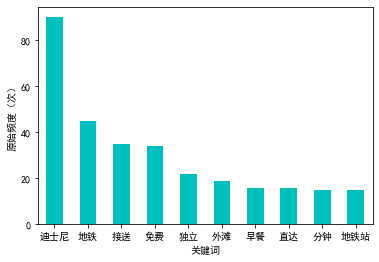

In [10]:
# 最受欢迎的前10个关键词（原始）
best_word_df.head(10).plot.bar(color='c')
plt.xlabel('关键词')
plt.ylabel('原始频度（次）')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '迪士尼'),
  Text(1, 0, '地铁'),
  Text(2, 0, '接送'),
  Text(3, 0, '独立'),
  Text(4, 0, '免费'),
  Text(5, 0, '房间'),
  Text(6, 0, '行李'),
  Text(7, 0, '早餐'),
  Text(8, 0, '北欧'),
  Text(9, 0, '消毒')])

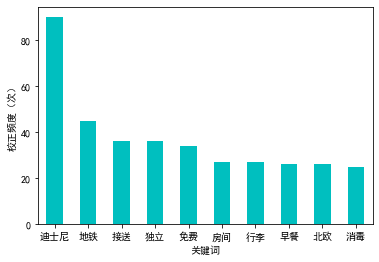

In [11]:
best_word_df = resort_keyword(best_word_df, left_word_df)
# 校正后最受欢迎的前10个关键词
best_word_df.sort_values(ascending=False).head(10).plot.bar(color='c')
plt.xlabel('关键词')
plt.ylabel('校正频度（次）')
plt.xticks(rotation=0)